# ITOM 6264 - Advanced Decision Models
*Alex Grill, Spring 2023*

# Question 1

An oil company must determine how many barrels of oil to extract during each of the next two years. If the company extracts $x_1$ million barrels during year 1, each barrel can be sold for $80-x_1$ dollars. If the company extracts $x_2$ million barrels during year 2, each barrel can be sold for $85-x_2$ dollars. The cost of extracting $x_1$ million barrels in year 1 is $2x_1^2$ million dollars, and the cost of extracting $x_2$ million barrels in year 2 is $3x_2^2$ million dollars. A total of 20 million barrels of oil are available, and at most \$250 million can be spent on extraction. The company wants to maximize its profit (revenue - cost) for the next two years.

**DV** 
 - $x_1$ = million barrels during year 1 
 - $x_2$ = million barrels during year 2

**OF**
max $f(x_1, x_2) = ((80 - x_1)* x_1 + (85 - x_2) * x_2) - (2x_1^2 + 3x_2^2)$

**Constraints**
- $x_1 + x_2 <= 20$ 
- $2x_1^2 + 3x_2^2 <= 250$
- $x_j\geq 0$ for $j = 1,2$

### Solve for the optimal solution using Pyomo


In [1]:
import matplotlib.pyplot as plt

from pyomo.environ import *
from pyomo.opt import SolverFactory
solver = SolverFactory('ipopt')

In [2]:
model = ConcreteModel()

# Define the decision variables:
model.x1 = Var(within=NonNegativeReals, bounds=(0,20), initialize=1.5)
model.x2 = Var(within=NonNegativeReals, bounds=(0,20), initialize=1.5)

# Objective function: 
def oil(model):
    return ((80 - model.x1)*model.x1 \
            + (85 - model.x2)*model.x2) \
            - (2*model.x1**2 + 3*model.x2**2) 

# Amount of oil available constraint:
def oilextract(model):
    return model.x1 + model.x2 <= 20

# Extraction budget constraint:
def oilbudget(model):
    return 2*model.x1**2 + 3*model.x2**2 <= 250

model.obj = Objective(rule=oil, sense=maximize)
model.oilextract = Constraint(rule=oilextract)
model.oilbudget = Constraint(rule=oilbudget)

solver.solve(model)

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 2, 'Number of variables': 2, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.11.1\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 1.7586095333099365}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [3]:
print('*** Solution *** ')
print('x1:', value(model.x1))
print('x2:', value(model.x2))

*** Solution *** 
x1: 8.182905788933352
x2: 6.22039945652549


# Question 2

A company has the following historical data on the number of ad exposures and the corresponding number of units sold of one of its products:

|Ads |0| 20| 40| 60| 80| 100| 120| 140| 160| 180| 200| 220| 240| 260| 280| 300| 320| 340| 360| 380| 400|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Units|3|18|34|46|56|65|72|78|82|85|90|90|93|94|95|101|98|100|98|101|105|


## (a) Power fit


**DV** 
$a, b$ as coefficients of $f(x) = ax^b$

**OF**
min $e(a,b) = \sum\limits_{i=1}^{21} (ax_i^b - y_i)^2$, where $(x_i,y_i)$ is the $i^{th}$ data point (\#ads, \#units) 

**Constraints** 
NA

### Solve for the optimal solution using Pyomo


In [4]:
ads = [i*20 for i in range(21)]
units = [3,18,34,46,56,65,72,78,82,85,90,90,93,94,95,101,98,100,98,101,105]

In [5]:
model = ConcreteModel()

# Define the decision variables:
model.a = Var(initialize = 1.5)
model.b = Var(initialize = 1.5)

# Objective function:
def objective(model):
    return sum(((model.a*ads[i]**model.b) - units[i])**2 
               for i in range(21))

model.obj = Objective(rule=objective, sense=minimize)

solver.solve(model)

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 0, 'Number of variables': 2, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.11.1\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.05841422080993652}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [6]:
print('*** Solution *** :')
print('a:', value(model.a))
print('b:', value(model.b))
print('sum of squared error:', model.obj())

*** Solution *** :
a: 9.337115970369062
b: 0.4117598792874509
sum of squared error: 689.9341193115957


## (b) Exponential fit


**DV** 
$a,b$ as coefficients of $f(x) = a(1- e^{-bx})$

**OF** 
min $e(a,b) = \sum\limits_{i=1}^{21} (a(1- e^{-bx_i}) - y_i)^2$, where $(x_i,y_i)$ is the $i^{th}$ data point (\#ads, \#units)

**Constraints** NA

### Solve for the optimal solution using Pyomo


In [7]:
model = ConcreteModel()

# Define the decision variables:
model.a = Var(initialize = 6)
model.b = Var(initialize = 1)

# Objective function:
def objective(model):
    return sum((model.a*(1-exp(-model.b*ads[i])) - units[i])**2 
               for i in range(21))

model.obj = Objective(rule=objective, sense=minimize)

solver.solve(model)

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 0, 'Number of variables': 2, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.11.1\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.0594630241394043}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [8]:
print('*** Solution *** :')
print('a:', value(model.a))
print('b:', value(model.b))
print('sum of squared error:', model.obj())

*** Solution *** :
a: 103.4993439592276
b: 0.009787489932294651
sum of squared error: 48.66466230297779


### (c) Discussion

In terms of fit, which of the two models is better? 

The exponential fit model is better. The exponential fit model has a lower sum of squared error value (`48.6647`) between the observed and predicted number of units sold compared to the power fit model (`689.9341`).

# Question 3

Alex is a high school student who scored 75 out of 100 points in the math midterm exam, 20 out of 100 in the Spanish midterm exam, and 65 out of 100 in the physics  midterm exam. Alex has the option to hire private tutors to improve his exam scores. The table below estimates the score Alex will get in the final exams after attending a certain number of hours of tutor sessions and the rate of tutors for the three subjects respectively. The highest score one can get for each subject is 100 points. We assume that Alex will get the same grade in the final exams, i.e., 75 for math, 20 for Spanish and 65 for physics, if he does not hire tutors at all. Alex is able to spend at most 40 hours on tutoring sessions before the final exam.


### (a) Formulate the optimization problem


Alex wants to maximize the total score of the three subjects in the final exams and minimize the tuition fees (cost of hiring private tutors). Formulate the problem as a single-objective optimization problem.


**DV** 
- $x_m$: Number of hours of Math tutoring sessions
- $x_s$: Number of hours of Spanish tutoring sessions
- $x_p$: Number of hours of Physics tutoring sessions

**OF**
    max $f(x_m, x_s, x_p)$ =  $75 + x_m - \frac{1}{10}x_s^2 + 6x_s + 20 + 85 - 20e^{-\frac{x_m + x_p}{20}}$ - $\theta$($50x_m + 40x_s + 60x_p)$

**Constraints** 
- $x_m + x_s + x_p \leq 40$ (total number of hours spent on tutoring sessions cannot exceed 40)
- $x_m \geq 0, x_s \geq 0, x_p \geq 0$ (number of hours spent on tutoring sessions must be non-negative)
- $\theta \geq 0$ (linearization parameter must be non-negative)

### (b) Re-formulate the optimization problem 

Now suppose that Alex wants to maximize the total score of the three subjects and is no longer concerned by tuition fees. Reformulate the problem and approximate the problem by linearizing the problem using piece-wise linear functions. 


**$\lambda$-Method:**

***Step 1: Separate objective function***

- $f(x_m) = 75 + x_m$ 
- $f(x_s) = -.10x_s^2 + 6x_s +20$ 
- $f(x_a) = 85 - 20e^{-\frac{x_a}{20}}$
    - (where $x_m + x_p = x_a$)

***Step 2: Check convexity/concavity***

- $f(x_m)$: (A linear function is both convex and concave)
- $f(x_s)$: (This function is concave as f''(x) = -0.2 which is  less than 0)
- $f(x_a)$: (This function is concave as f''(x) = $-(e^{-\frac{x_a}{20}})/20$ which will always be negative and therefore less than 0)

***Step 3: Determine region for approximation***

- $0 \leq f(x_m) \leq 25$ 
- $0 \leq f(x_s) \leq 20$ 
- $0 \leq f(x_a) \leq 40$ 


***Step 4: Approximate separable functions***

- $f(x_m)$: 
    - $\lambda_{10}$ = (0,75)
    - $\lambda_{11}$ = (25,100)

- $f(x_s)$: 
    - $\lambda_{20}$ = (0,20)
    - $\lambda_{21}$ = (7,57.1)
    - $\lambda_{22}$ = (14,84.4)
    - $\lambda_{23}$ = (20,100)
    
- $f(x_a)$: 
    - $\lambda_{30}$ = (0,65)
    - $\lambda_{31}$ = (15,75.553)
    - $\lambda_{32}$ = (30,80.537)
    - $\lambda_{33}$ = (40,82.293) 


**Problem Formulation:**

**DV** 

- $\lambda_{10}$, $\lambda_{11}$

- $\lambda_{20}$, $\lambda_{21}$, $\lambda_{22}$, $\lambda_{23}$

- $\lambda_{30}$, $\lambda_{31}$, $\lambda_{32}$, $\lambda_{33}$


**OF**
Max: $f(x_m) + f(x_s) + f(x_a)$

- $f(x_m) = 75\lambda_{10} + 100\lambda_{11}$
- $f(x_s) = 20\lambda_{20} + 57.1\lambda_{21} + 84.4\lambda_{22} + 100\lambda_{23}$
- $f(x_a) = 65\lambda_{30} + 75.553\lambda_{31} + 80.537\lambda_{32} + 82.293\lambda_{33}$



**Constraints** 
- $x_a + x_s \leq 40$ (total number of hours spent on tutoring sessions cannot exceed 40)
    - therefore 0$\lambda_{30} + 15\lambda_{31} + 30\lambda_{32} + 40\lambda_{33}$ + 0$\lambda_{20} + 7\lambda_{21} + 14\lambda_{22} + 20\lambda_{23}$ $\leq 40$


- $x_m \geq 0, x_s \geq 0, x_p \geq 0$ (number of hours spent on tutoring sessions must be non-negative)
    - therefore for $x_m$: $0\lambda_{10} + 25\lambda_{11} \geq 0$
    - therefore for $x_s$: $0\lambda_{20} + 7\lambda_{21} + 14\lambda_{22} + 20\lambda_{23} \geq 0$
    - therefore for $x_p = x_a - x_m$: $0\lambda_{30} + 15\lambda_{31} + 30\lambda_{32} + 40\lambda_{33} - 0\lambda_{10} - 25\lambda_{11} \geq 0$
    


- $\lambda_{10} + \lambda_{11}$ = 1
- $\lambda_{20} + \lambda_{21} + \lambda_{22} + \lambda_{23}$ = 1
- $\lambda_{30} + \lambda_{31} + \lambda_{32} + \lambda_{33}$ = 1
- $\lambda_{10}, \lambda_{11}, \lambda_{20}, \lambda_{21}, \lambda_{22}, \lambda_{23}, \lambda_{30}, \lambda_{31}, \lambda_{32}, \lambda_{33} \geq 0$


### (c) Solve for the optimal solution


In [9]:
model = ConcreteModel()

# Define the decision variables

#Function Xm
model.la10 = Var(initialize=.25, bounds=(0,1))
model.la11 = Var(initialize=.25, bounds=(0,1))

#Function Xs
model.la20 = Var(initialize=.25, bounds=(0,1))
model.la21 = Var(initialize=.25, bounds=(0,1))
model.la22 = Var(initialize=.25, bounds=(0,1))
model.la23 = Var(initialize=.25, bounds=(0,1))

#Function Xa
model.la30 = Var(initialize=.25, bounds=(0,1))
model.la31 = Var(initialize=.25, bounds=(0,1))
model.la32 = Var(initialize=.25, bounds=(0,1))
model.la33 = Var(initialize=.25, bounds=(0,1))



# Define the objective function
def scores(model):
    return 75*model.la10 + 100*model.la11 \
            + 20*model.la20 + 57.1*model.la21 + 84.4*model.la22 + 100*model.la23 \
            + 65*model.la30 + 75.533*model.la31 \
            + 80.537*model.la32 + 82.293*model.la33

# Define constraint hours:
def constrainthours(model): 
    return 0*model.la30 + 15*model.la31 + 30*model.la32 + 40*model.la33 \
            + 0*model.la20 + 7*model.la21 + 14*model.la22 + 20*model.la23 <= 40

# Define constraint xm hours greater than or equal to 0:
def constraint0xm(model): 
    return 0*model.la10 + 25*model.la11 >= 0

# Define constraint xs hours greater than or equal to 0:
def constraint0xs(model): 
    return 0*model.la20 + 7*model.la21 + 14*model.la22 + 20*model.la23 >= 0

# Define constraint xp = xa - xm hours greater than or equal to 0:
def constraint0xp(model): 
    return 0*model.la30 + 15*model.la31 + 30*model.la32 + 40*model.la33 \
            - 0*model.la10 - 25*model.la11 >= 0

# Define constraint sum xm lamdba equal to 1:
def constraintxm(model): 
    return model.la10 + model.la11 == 1

# Define constraint sum xs lamdba equal to 1:
def constraintxs(model): 
    return model.la20 + model.la21 + model.la22 + model.la23 == 1

# Define constraint sum xa lamdba equal to 1:
def constraintxa(model): 
    return model.la30 + model.la31 + model.la32 + model.la33 == 1


model.obj = Objective(rule=scores, sense=maximize)
model.con1 = Constraint(rule=constrainthours)
model.con2 = Constraint(rule=constraint0xm)
model.con3 = Constraint(rule=constraint0xs)
model.con4 = Constraint(rule=constraint0xp)
model.con5 = Constraint(rule=constraintxm)
model.con6 = Constraint(rule=constraintxs)
model.con7 = Constraint(rule=constraintxa)

solver.solve(model)

# Print the solution
print('*** Solution *** :')
print("la10: ", value(model.la10))
print("la11: ", value(model.la11))
print("la20: ", value(model.la20))
print("la21: ", value(model.la21))
print("la22: ", value(model.la22))
print("la23: ", value(model.la23))
print("la30: ", value(model.la30))
print("la31: ", value(model.la31))
print("la32: ", value(model.la32))
print("la33: ", value(model.la33))
print("Math Final Exam Score: ", \
      value(75*model.la10 + 100*model.la11))
print("Spanish Final Exam Score: ", \
      value(20*model.la20 + 57.1*model.la21 + 84.4*model.la22 + 100*model.la23))
print("Physics Final Exam Score: ", \
      value(65*model.la30 + 75.533*model.la31 \
            + 80.537*model.la32 + 82.293*model.la33))
print("Optimal 3-Subject Total Score: ", value(model.obj))
print("Number of hours of Math tutoring sessions: ", value(model.con2))
print("Number of hours of Spanish tutoring sessions: ", value(model.con3))
print("Number of hours of Physics tutoring sessions: ", value(model.con4))
print("Total tutoring session hours: ", value(model.con1))

*** Solution *** :
la10:  0.19999999442491895
la11:  0.8000000055750811
la20:  0.0
la21:  0.0
la22:  1.0151546749075471e-08
la23:  1.0
la30:  0.0
la31:  0.6666666713586896
la32:  0.3333333466020663
la33:  0.0
Math Final Exam Score:  95.00000013937704
Spanish Final Exam Score:  100.00000085679055
Physics Final Exam Score:  77.20100142302653
Optimal 3-Subject Total Score:  272.2010024191941
Number of hours of Math tutoring sessions:  20.00000013937703
Number of hours of Spanish tutoring sessions:  20.000000142121653
Number of hours of Physics tutoring sessions:  3.2906530478271634e-07
Total tutoring session hours:  40.00000061056399


# Question 4

A startup company needs to increase its sales of a product through advertisements. If the company spends $a$ (measured in thousands of dollars) on advertising and charges a price of $p=10+0.38a$ dollars per unit, then it can sell $1000-10p+20\sqrt{a}$  units of the product. The cost per unit of producing the product is $6. Help the company find at least 10 Pareto-optimal solutions and plot the Pareto-optimal frontier between the objectives of maximizing profit and maximizing the number of units sold.

### (a) Problem Formulation

**DV** 

- $x_a=$ amount spent $a$ (in thousands of dollars) on advertisements

- $x_p=$ charge price per unit



**OF**
- max $sales(units)  = f_1 = {1000 - 10x_p + 20\sqrt{x_a}}$
- max $profit = f_2 = ((x_p - 6) * {1000 - 10x_p + 20\sqrt{x_a}}) - (1000 * x_a)$


**Constraints**
- $x_a \geq 0$
- $x_p \geq 0$
- $x_p = 10 + 0.38x_a$
- $f_1 \geq 0$

### (b) Determine extreme points

In [10]:
model = ConcreteModel()


model.a = Var(within=NonNegativeReals, initialize = 1)
model.p = Var(within=NonNegativeReals, initialize = 1)

model.ConPrice = Constraint(expr = model.p == 10 + .38*model.a)


"""for convenience, we define two more variables: the value of OFs:"""

model.sales = Var(within=NonNegativeReals)
model.profit = Var()

model.ConSales = Constraint(expr= model.sales == \
                            1000 - 10 * model.p + 20 * sqrt(model.a))
model.ConProfit = Constraint(expr= model.profit == (model.p - 6)\
                             * (1000 - 10 * model.p + 20\
                                * sqrt(model.a )) - (1000 * model.a))



model.obj1 = Objective(expr= model.sales, sense=maximize)
model.obj2 = Objective(expr= model.profit, sense=maximize)

In [11]:
#Maximize f1 = sales and ignore f2 = profit 

model.obj2.deactivate()

solver.solve(model);

print('*** Solution for highest sales (ignoring profit) *** :')
print('advertising spending (in thousands of dollars) = ', model.a())
print('charge price per unit (in dollars) = ', model.p())
print('sales (units) = ', model.sales())
print('profit = ', model.profit())

      
sales_max1 = value(model.sales)
profit_max1 = value(model.profit)

*** Solution for highest sales (ignoring profit) *** :
advertising spending (in thousands of dollars) =  6.925207757826252
charge price per unit (in dollars) =  12.631578947973976
sales (units) =  926.3157894736844
profit =  -782.2714691766738


In [12]:
#Maximize f2 = profit and ignore f1 = sales

model.obj2.activate()
model.obj1.deactivate()
solver.solve(model);

print('*** Solution for highest sales (ignoring profit) *** :')
print('advertising spending (in thousands of dollars) = ', model.a())
print('charge price per unit (in dollars) = ', model.p())
print('sales (units) = ', model.sales())
print('profit = ', model.profit())

      
sales_max2 = value(model.sales)
profit_max2 = value(model.profit)

*** Solution for highest sales (ignoring profit) *** :
advertising spending (in thousands of dollars) =  0.003537478767355662
charge price per unit (in dollars) =  10.001344241931594
sales (units) =  901.1760917361177
profit =  3602.3782868673766


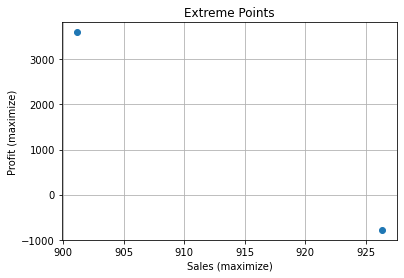

In [13]:
extreme_f1 = [sales_max1, sales_max2]
extreme_f2 = [profit_max1, profit_max2]  
plt.scatter(extreme_f1, extreme_f2)
plt.title('Extreme Points');
plt.xlabel('Sales (maximize)')
plt.ylabel('Profit (maximize)')
plt.grid(True);

### (c) Find Pareto-optimal points and plot the Pareto frontier

Pareto-optimal solutions: [(901.1762393388809, 3602.3782868673766), (914.5277406153614, 3163.9133112629715), (918.6086678958981, 2725.4483356585665), (921.1568207236687, 2286.9833600541615), (922.9097213754104, 1848.5183844497565), (924.1537087129227, 1410.0534088453514), (925.0359645237921, 971.5884332409464), (925.644114802831, 533.1234576365414), (926.0353774461358, 94.65848203213636), (926.2495819050746, -343.80649357226866), (926.3157894736842, -782.2714691766737)]


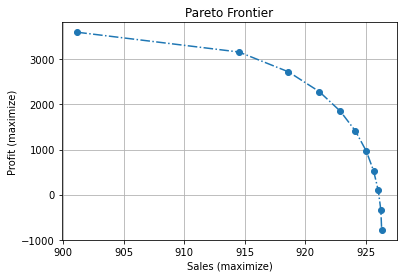

In [14]:
#maximize f1 = sales(units) given f2 = profit levels

model.obj1.activate()
model.obj2.deactivate()

model.epsilon = Param(mutable=True) 
model.ConEpsilon = Constraint(expr = model.profit == model.epsilon)

n = 10
interval = (profit_max1 - profit_max2) / n
profit_levels = [profit_max2 + k*interval for k in range(n+1) ]

sales_pareto = []
for level in profit_levels:
    model.epsilon = level
    solver.solve(model);
    sales_pareto.append(value(model.sales))

"""Pareto-optimal points:"""
Pareto = [(sales_pareto[k],profit_levels[k]) for k in range(n+1)]
print('Pareto-optimal solutions:', Pareto)
    
plt.plot(sales_pareto, profit_levels,'o-.');
plt.title('Pareto Frontier');
plt.xlabel('Sales (maximize)')
plt.ylabel('Profit (maximize)')
plt.grid(True);

### (d) Discussion

Suppose the startup company now decides that although both objectives are important, maximizing the number of units sold is more important than maximizing profit. What suggestions would you give to the company based on the produced results?

I would advise against this decision. The analysis shows that maximizing for units sold and disregarding profit leads to selling 926 units but only making 94.66 dollars in profit (i.e., looking at the point on the Pareto Frontier nearest 926, since you cannot sell a fraction of a unit). In this formulation the company massively over spends on advertising for only marginally more units sold. If instead the company chose to prioritize profit the company would sell 901 units but would record 3,602.38 dollars in profit. That means with a decrease of 25 units sold, the company would gain 3,507.72 dollars in profit. Considering this, the startup could still find it acceptable to sacrifice some profit in order to sell more units, and in that case we would recommend one of the points plotted on the Pareto Frontier graph. Which point they choose would come down to the weight that they assign to each function, and which function will help them better achieve their strategic goals.

# Question 5

Hiland Appliance must determine how many TVs and Blu-Ray disc players to stock. It costs Hiland \\$1000 to purchase a TV and \\$200 to purchase a Blu-Ray player. A TV requires three square yards of storage space, and a Blu-ray disc player requires one square yard. The sale of a TV earns Hiland a profit of \\$150, and each Blu-ray disc player sale earns a profit of \\$50. Hiland has set the following goals (listed in order of importance):

- Goal 1: A maximum of \\$60,000 can be spent on purchasing TVs and Blu-ray disc players.
- Goal 2: Maximize profit from the sale of TVs and Blu-ray disc players.
- Goal 3: Minimize storage space for TVs and Blu-ray disc players.

### (a) Formulate the problem

**Lexicographic Method:**

**Step 1: find $y_2^*$ by optimizing $f_1$ = profit(dollars)**

**DV** 

- $x_1=$ amount of TV's stocked

- $x_2=$ amount of Blu-Ray disc players stocked


**OF** 
- max $profit (dollars) = f_1 = (150 * x_1) + (50 * x_2)$


**Constraints**
- $x_1 \geq 0$
- $x_2 \geq 0$
- $(1000 * x_1) + (200 * x_2) \leq 60,000$


**Step 2: optimizing $f_2$ = storage(sq. yards) with additional constraint containing $y_2^*$**

**DV** 

- $x_1=$ amount of TV's stocked

- $x_2=$ amount of Blu-Ray disc players stocked

**OF** 
- min $storage (sq. yards) = f_2 = (3 * x_1) + x_2$


**Constraints**
- $(150 * x_1) + (50 * x_2)\geq y_2^*$
- $x_1 \geq 0$
- $x_2 \geq 0$
- $(1000 * x_1) + (200 * x_2) \leq 60,000$
- $f_2 \geq 0$

### (b) Find a Pareto-optimal point

In [15]:
model = ConcreteModel()


model.x1 = Var(within=NonNegativeReals, initialize = 1)
model.x2 = Var(within=NonNegativeReals, initialize = 1)


"""for convenience, we define two more variables: the value of OFs:"""

model.profit = Var()
model.storage = Var(within=NonNegativeReals)


model.ConProfit = Constraint(expr = model.profit == (150 * model.x1)\
                             + (50 * model.x2))
model.ConStorage = Constraint(expr = model.storage == (3 * model.x1)\
                              + model.x2)

# Adding this constraint ensures that maximum spend (Goal #1)
# is taken care of above all else 
model.ConPurchases = Constraint(expr = (1000 * model.x1)\
                                + (200 * model.x2) <= 60000)


model.obj1 = Objective(expr= model.profit, sense=maximize)
model.obj2 = Objective(expr= model.storage, sense=minimize)

In [16]:
#Lexicogrpahic Method Step 1 
    #This code deactivates f2 = min storage(sq. yards) and 
    # activates f1 = max profit(dollars)

model.obj2.deactivate()
model.obj1.activate()

solver.solve(model);

print('*** Solution for maximized profit (ignoring storage) *** :')
print('Number of TVs stocked: ', model.x1())
print('Number of Blu-Ray disc players stocked: ', model.x2())
print('Total spent on stock purchases (dollars): ', model.ConPurchases())
print('Total profit (dollars): ', model.profit())
print('Total storage (sq. yards): ', model.storage())


profit_max = value(model.profit)
storage_max = value(model.storage)

*** Solution for maximized profit (ignoring storage) *** :
Number of TVs stocked:  0.0
Number of Blu-Ray disc players stocked:  300.00000304982456
Total spent on stock purchases (dollars):  60000.00060996491
Total profit (dollars):  15000.000150994987
Total storage (sq. yards):  300.0000030198997


In [17]:
#Lexicographic Method Step 2 
    #This code deactivates f1 = max profit(dollars) and 
    # activates f2 = min storage(sq. yards)
        
model.obj1.deactivate()
model.obj2.activate()

#Adding this constraint ensures that maximizing profit (Goal #2)
# is prioritized before minimizing storage (Goal #3)
model.ConProfitBest = Constraint(expr = model.profit >= profit_max)

solver.solve(model)

print('*** Solution for minimized storage (with max profit level) *** :')
print('Number of TVs stocked: ', model.x1())
print('Number of Blu-Ray disc players stocked: ', model.x2())
print('Total spent on stock purchases (dollars): ', model.ConPurchases())
print('Total profit (dollars): ', model.profit())
print('Total storage (sq. yards): ', model.storage())


profit_max = value(model.profit)
storage_max = value(model.storage)

*** Solution for minimized storage (with max profit level) *** :
Number of TVs stocked:  7.567542649826714e-07
Number of Blu-Ray disc players stocked:  299.999997752763
Total spent on stock purchases (dollars):  60000.000307306866
Total profit (dollars):  15000.000001151291
Total storage (sq. yards):  300.0000000230258
